<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное = RM, MEDV
2.   Равномерное
3.   Биноминальное = RAD, TAX
4.   Бернулли = CHAS
5.   Геометрическое = DIS
6.   Логнормальное = CRIM



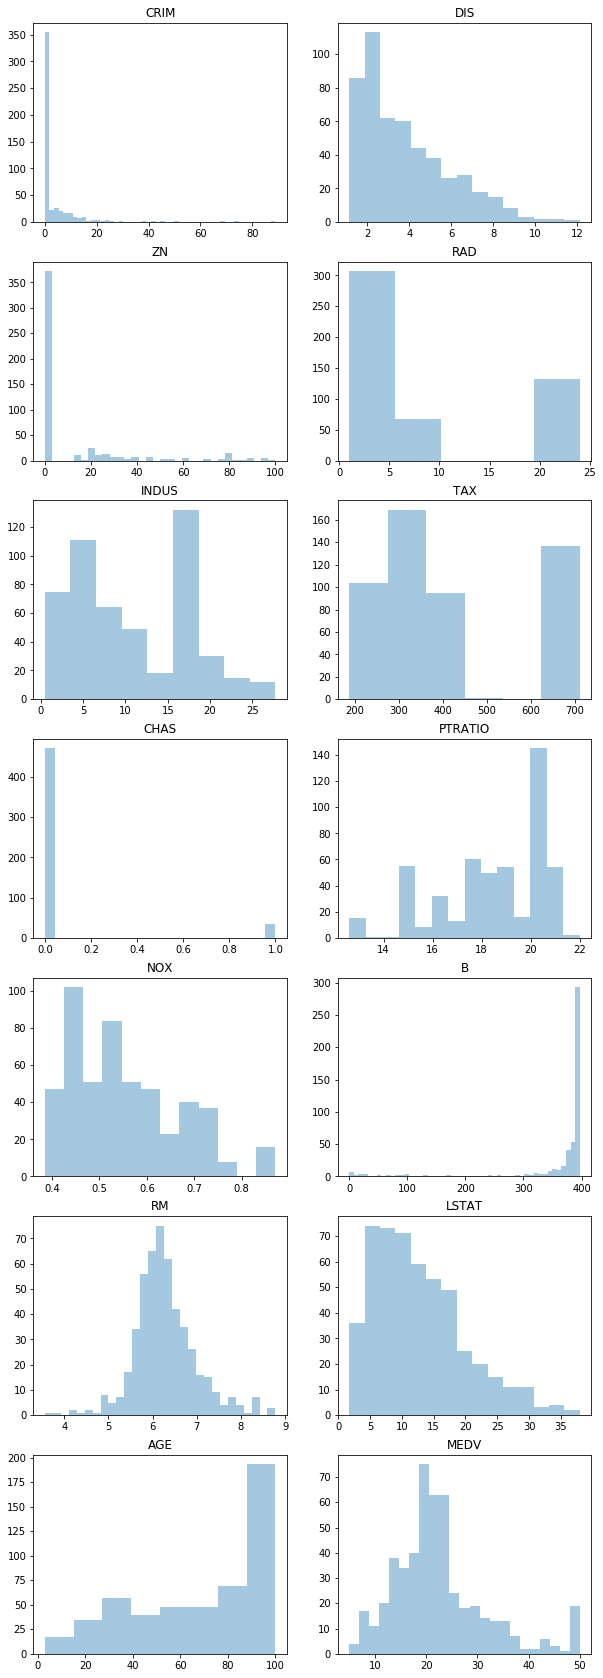

In [4]:
# частотные графики
fig, axs = plt.subplots(nrows=7, ncols=2,  figsize=(10,30))
for i in range(2): 
    for j in range(7):
        sns.distplot(data.iloc[:,[j+7*i]], kde=False, ax=axs[j, i])
        axs[j,i].set_title(data.columns[j+7*i])

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

In [5]:
# матрица корреляции
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [6]:
mdev_corr = data.corr()['MEDV'].sort_values(ascending=False)
print('Максимальная корреляция с ценой дома (MDEV) у атрибутов: ')
print(mdev_corr[(mdev_corr != 1) & ((mdev_corr > 0.6) | (mdev_corr < -0.6))])

Максимальная корреляция с ценой дома (MDEV) у атрибутов: 
RM       0.695360
LSTAT   -0.737663
Name: MEDV, dtype: float64


Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



29.838224095613224
4.219496369833326


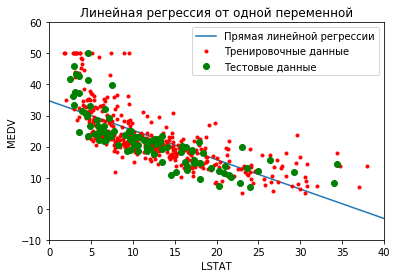

In [7]:
# линейная регрессия MDEV & LSTAT
# 0 подготовка данных 
medv = np.array(data['MEDV']).reshape(-1,1)
lstat = np.array(data['LSTAT']).reshape(-1,1)



# 1. разделение данных на 80% тренировочных и 20% тестовых 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(    
    lstat,
    medv,
    test_size = 0.2
)

# 2. Модель
from sklearn.linear_model import LinearRegression
model_medv_lstat = LinearRegression()
model_medv_lstat.fit(x_train, y_train)

# 3. ошибка модели на тестовых данных 
from sklearn.metrics import mean_squared_error, mean_absolute_error
predicted_y = model_medv_lstat.predict(x_test)
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

# 4 график
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(0, 50, 100)
# Посчитаем предсказанные значения
y = model_medv_lstat.coef_*x + model_medv_lstat.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(x_train, y_train, 'r.')
plt.plot(x_test, y_test, 'go')
plt.xlim(0, 40)
plt.ylim(-10, 60)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

52.77646282136898
5.189219960803882


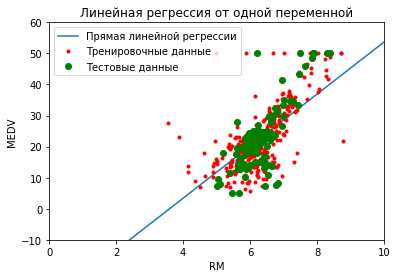

In [8]:
# линейная регрессия MDEV & RM
# 0 подготовка данных 
medv = np.array(data['MEDV']).reshape(-1,1)
rm = np.array(data['RM']).reshape(-1,1)



# 1. разделение данных на 80% тренировочных и 20% тестовых 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(    
    rm,
    medv,
    test_size = 0.2
)

# 2. Модель
from sklearn.linear_model import LinearRegression
model_medv_rm = LinearRegression()
model_medv_rm.fit(x_train, y_train)

# 3. ошибка модели на тестовых данных 
from sklearn.metrics import mean_squared_error, mean_absolute_error
predicted_y = model_medv_rm.predict(x_test)
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

# 4 график
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(0, 50, 100)
# Посчитаем предсказанные значения
y = model_medv_rm.coef_*x + model_medv_rm.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(x_train, y_train, 'r.')
plt.plot(x_test, y_test, 'go')
plt.xlim(0, 10)
plt.ylim(-10, 60)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [9]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [10]:
print('Количество отсутствующих значений по столбцам: ')
print(data.isnull().sum())

Количество отсутствующих значений по столбцам: 
Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64


Сколько стран в выборке? Написать ответ. 

In [11]:
print('В выборке', data['Country (region)'].nunique(), 'стран.')

В выборке 156 стран.


Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [12]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.00,0.54,0.49,0.52,0.82,0.55,0.19,0.50,0.81,0.82
SD of Ladder,0.54,1.00,0.09,0.62,0.60,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.09,1.00,0.39,0.39,0.68,0.21,0.35,0.30,0.33
Negative affect,0.52,0.62,0.39,1.00,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.60,0.39,0.62,1.00,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1.00,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1.00,0.27,0.20,0.12
Generosity,0.50,0.39,0.35,0.34,0.44,0.49,0.27,1.00,0.48,0.43
Log of GDP per capita,0.81,0.63,0.30,0.54,0.77,0.41,0.20,0.48,1.00,0.85
Healthy life expectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1.00


In [13]:
cor = data.corr()
print('В выбоке есть', cor[(cor > 0.7) & (cor != 1.)].count().sum()/2,'пар с коэффициентом корреляции более 0.7')

В выбоке есть 6.0 пар с коэффициентом корреляции более 0.7


Данные избыточны - часть можно заменить линейной регрессией.

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

Text(0.5, 1.0, 'Плотности вероятности выпадания стороны')

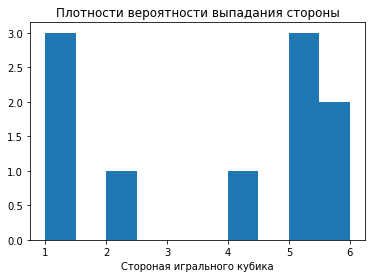

In [14]:
# моделирование 10 подбрасываний
cube = np.random.randint(1, high=6+1, size=10)

ax = plt.hist(cube)
plt.xlabel('Стороная игрального кубика')
plt.title('Плотности вероятности выпадания стороны')

Для 10 подбрасываний сложно судить - распределение м.б. разным. По теории - равномерное распределение, что нагляднее видно для большего количества подбрасываний:

Text(0.5, 1.0, 'Плотности вероятности выпадания стороны')

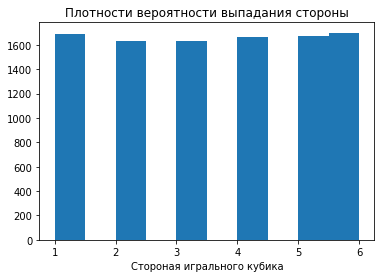

In [15]:
# моделирование 10 тыс. подбрасываний
cube = np.random.randint(1, high=6+1, size=10000)

ax = plt.hist(cube)
plt.xlabel('Стороная игрального кубика')
plt.title('Плотности вероятности выпадания стороны')

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

Text(0.5, 1.0, 'Плотности вероятности выпадания стороны')

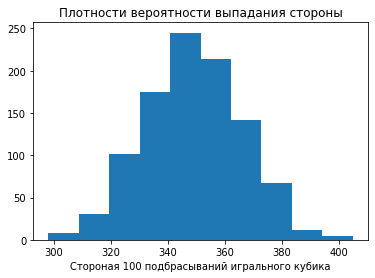

In [16]:
sum_cubes = []
for _ in range(1000):
    sum_cubes.append(sum(np.random.randint(1, high=6+1, size=100)))

ax = plt.hist(sum_cubes)
plt.xlabel('Стороная 100 подбрасываний игрального кубика')
plt.title('Плотности вероятности выпадания стороны')

Сами суммы большого количества (100) случайных ввеличин одного масштаба не зависят друг от друга. И поэтому имеют распределение близкого масштаба - в соответствии с центральной предельной теоремой.